In [1]:
import sys
sys.path.append("../util/")

from ipynb.fs.full.k_means import k_means, bisecting_k_means
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(x1, x2):
    return np.exp(-np.linalg.norm(np.subtract(x1, x2)))


def radial_basis_function_network(dataset, k, phi):
    c, info = bisecting_k_means(dataset[:, :2], k)
    label = np.zeros(k)
    for i in range(k):
        label[i] = float(np.mean(dataset[np.nonzero(info[:, 0]==i), 2], axis=1))
    weights = np.zeros(k)
    for example in dataset:
        tmp = np.array([phi(example[:2], c[i]) for i in range(k)])
        y = np.dot(weights, tmp)
        weights += 0.5*(example[2]-y)*tmp
    return c, info, weights

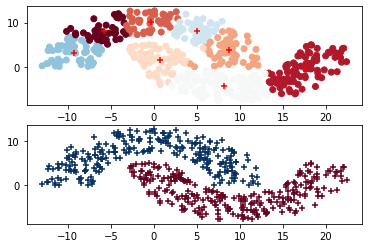

In [3]:
if __name__ == "__main__":
    from ipynb.fs.full.data_generator_2d import double_moon
    dataset = double_moon(500, d=-5)
    np.random.shuffle(dataset)
    c, info, w = radial_basis_function_network(dataset, 8, phi)
    fig = plt.figure()
    ax = fig.subplots(2, 1)
    ax[0].scatter(dataset[:,0], dataset[:,1], color=plt.cm.RdBu(info[:,0]/10))
    ax[0].scatter(c[:,0],c[:,1], color="r", marker="+")
    for example in dataset[:, :2]:
        y = np.dot(np.array([phi(example, xj) for xj in c]), w)
        ax[1].scatter(example[0], example[1], color=plt.cm.RdBu(np.sign(y)), marker="+")
    plt.show()